In [48]:
import torch
import torch.optim as optim
import matplotlib.pyplot as plt
%matplotlib inline

## Simple linear regression 
Today we will look at linear regression in Pytorch. We get some data points of `(x, y)`, and if we visualize the data, then we see that the `x` and `y` have a linear relationship. They can't fit into a straight line perfectly since there is noise. How do we find the best fitting line? And what do I mean it is the best fitting  line? Let's start with finding the best fitting line.

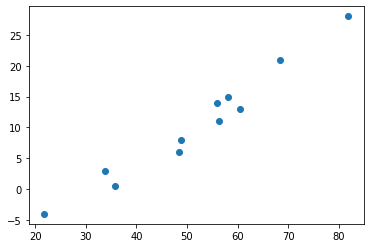

In [56]:
y = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
x = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
plt.scatter(x, y)

To work with Pytorch, we convert the data points into Pytorch tensor. 

In [57]:
x = torch.tensor(x)
y = torch.tensor(y)
# Normalize the data 
scale_x = ((x.max() - x.min()))
scale_y = (y.max() - y.min())
x = x /(x.max() - x.min())
y = y /(y.max() - y.min())

Here we define our model as a linear function and define a loss function. To consider the best fitting line, we want to find `w` and `b` minimize the errors between the prediction and the data.

In [58]:
def model(x, w, b):
    return w*x + b

def mean_square(y_gt, y):
    squared_diffs = (y_gt - y)**2
    return squared_diffs.mean()

In [8]:
# Initialize a parameter tensor with `requires_grad=True`, 
# which tells the Pytorch to track all the operations on params.
params = torch.tensor([1.0, 1.0], requires_grad=True)

In [9]:
# In general, the `grad` attribute of params tensor is None 
# To populate its derivative, we need to compute the loss and call 
# backward on the loss tensor:
print(params.grad is None)
loss = mean_square(model(x, *params), y)
loss.backward()
loss

True


tensor(2.3553, grad_fn=<MeanBackward0>)

Now, we can see that the `grad` attribute of `params` contains the derivatives of 
$$\partial (loss)/\partial (params) = < \partial / \partial w, \partial / \partial b > loss$$.

In [10]:
params.grad

tensor([2.6427, 3.0675])

Calling `backward` makes derivatives accumulate for each parameter. You need to make the gradient zero explicitly after using it. For example:

In [59]:
print(params.grad is None)
loss = mean_square(model(x, *params), y)
loss.backward()
print(params.grad)

if params.grad is not None:
    params.grad.zero_()
    
params.grad

True
tensor([-0.0004,  0.0004])


tensor([0., 0.])

In [60]:
def training_loop(n_epochs, learning_rate, params, y, x):
    for epoch in range(1, n_epochs + 1):
        if params.grad is not None:
            params.grad.zero_()
        y_p = model(x, *params)
        loss = mean_square(y_p, y)
        loss.backward()
        if epoch >6000:
            learning_rate = 1e-3
        params = (params - learning_rate * params.grad).detach().requires_grad_()
        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, loss))
    return params

In [61]:
params = training_loop(
    n_epochs=5000,
    learning_rate=1e-2,
    params=torch.tensor([1.0, 0.0], requires_grad=True),
    y=y,
    x=x)
params

Epoch 500, Loss 0.005290
Epoch 1000, Loss 0.003947
Epoch 1500, Loss 0.003346
Epoch 2000, Loss 0.003077
Epoch 2500, Loss 0.002956
Epoch 3000, Loss 0.002903
Epoch 3500, Loss 0.002879
Epoch 4000, Loss 0.002868
Epoch 4500, Loss 0.002863
Epoch 5000, Loss 0.002861


tensor([ 1.0032, -0.5364], requires_grad=True)

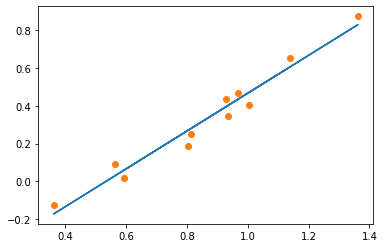

In [62]:
y_p = model(x, *params)
plt.plot(x.numpy(), y_p.detach().numpy(), x, y, 'o')

In [63]:
def training_loop_v1(n_epochs, learning_rate, params, y, x):
    optimizer = optim.Adam([params], lr=learning_rate)
    for epoch in range(1, n_epochs + 1):
        y_p = model(x, *params)
        loss = mean_square(y_p, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if epoch >6000:
            learning_rate = 1e-3
        params = (params - learning_rate * params.grad).detach().requires_grad_()
        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, loss))
    return params

In [64]:
params = training_loop(
    n_epochs=5000,
    learning_rate=1e-2,
    params=torch.tensor([1.0, 0.0], requires_grad=True),
    y=y,
    x=x)
params

Epoch 500, Loss 0.005290
Epoch 1000, Loss 0.003947
Epoch 1500, Loss 0.003346
Epoch 2000, Loss 0.003077
Epoch 2500, Loss 0.002956
Epoch 3000, Loss 0.002903
Epoch 3500, Loss 0.002879
Epoch 4000, Loss 0.002868
Epoch 4500, Loss 0.002863
Epoch 5000, Loss 0.002861


tensor([ 1.0032, -0.5364], requires_grad=True)